In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
from sklearn.neighbors import KNeighborsClassifier

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.metrics import confusion_matrix

In [9]:
#import csv file
data2=pd.read_csv("weather.csv")

In [10]:
#check null cells
data2.isna()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
362,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
363,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
364,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
len(data2)

366

In [12]:
nulcount=data2.isnull().sum().sum()
nulcount

47

In [13]:
#drop null data 
data2=data2.dropna(axis=0)
data2=data2.reset_index(drop=True)

In [14]:
len(data2)

328

In [15]:
nulcount=data2.isnull().sum().sum()
nulcount

0

In [16]:
data2

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,9.0,30.7,0.0,7.6,12.1,NNW,76.0,SSE,NW,7.0,...,15,1016.1,1010.8,1,3,20.4,30.0,No,0.0,No
324,7.1,28.4,0.0,11.6,12.7,N,48.0,NNW,NNW,2.0,...,22,1020.0,1016.9,0,1,17.2,28.2,No,0.0,No
325,12.5,19.9,0.0,8.4,5.3,ESE,43.0,ENE,ENE,11.0,...,47,1024.0,1022.8,3,2,14.5,18.3,No,0.0,No
326,12.5,26.9,0.0,5.0,7.1,NW,46.0,SSW,WNW,6.0,...,39,1021.0,1016.2,6,7,15.8,25.9,No,0.0,No


In [17]:
l=pd.DataFrame()

In [18]:
l["WindGustDir"]=data2.WindGustDir

In [19]:
l["WindDir9am"]=data2.WindDir9am

In [20]:
l["WindDir3pm"]=data2.WindDir3pm

In [21]:
l

,WindGustDir,WindDir9am,WindDir3pm
0,NW,SW,NW
1,ENE,E,W
2,NW,N,NNE
3,NW,WNW,W
4,SSE,SSE,ESE
...,...,...,...
323,NNW,SSE,NW
324,N,NNW,NNW
325,ESE,ENE,ENE
326,NW,SSW,WNW


In [22]:
#using LabelEncoder or labling data 
l1=LabelEncoder()
l3=LabelEncoder()
l2=LabelEncoder()

In [23]:
l["WindGustDir"]=l1.fit_transform(l["WindGustDir"])

In [24]:
l["WindDir9am"]=l1.fit_transform(l["WindDir9am"])

In [25]:
l["WindDir3pm"]=l1.fit_transform(l["WindDir3pm"])

In [26]:
l

,WindGustDir,WindDir9am,WindDir3pm
0,7,12,7
1,1,0,13
2,7,3,5
3,7,14,13
4,10,10,2
...,...,...,...
323,6,10,7
324,3,6,6
325,2,1,1
326,7,11,14


In [27]:
lu=l.isnull().sum().sum()
lu

0

In [28]:
inputt=data2.drop(["WindGustDir","WindDir9am","WindDir3pm","RainToday","RainTomorrow"],axis=1)

In [29]:
xinul=inputt.isnull().sum().sum()
xinul

0

In [30]:
rt=pd.DataFrame()

In [31]:
l4=LabelEncoder()

In [32]:
rt["RainToday"]=l4.fit_transform(data2["RainToday"])
rt

,RainToday
0,0
1,1
2,1
3,1
4,1
...,...
323,0
324,0
325,0
326,0


In [33]:
rrtt=rt.isnull().sum().sum()
rrtt

0

In [34]:
inputt["RainToday"]=rt["RainToday"]
inputt["WindGustDir"]=l["WindGustDir"]
inputt["WindDir9am"]=l["WindDir9am"]
inputt["WindDir3pm"]=l["WindDir3pm"]

In [35]:
xinul=inputt.isnull().sum().sum()
xinul

0

In [36]:
inputt

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM,RainToday,WindGustDir,WindDir9am,WindDir3pm
0,8.0,24.3,0.0,3.4,6.3,30.0,6.0,20,68,29,...,1015.0,7,7,14.4,23.6,3.6,0,7,12,7
1,14.0,26.9,3.6,4.4,9.7,39.0,4.0,17,80,36,...,1008.4,5,3,17.5,25.7,3.6,1,1,0,13
2,13.7,23.4,3.6,5.8,3.3,85.0,6.0,6,82,69,...,1007.2,8,7,15.4,20.2,39.8,1,7,3,5
3,13.3,15.5,39.8,7.2,9.1,54.0,30.0,24,62,56,...,1007.0,2,7,13.5,14.1,2.8,1,7,14,13
4,7.6,16.1,2.8,5.6,10.6,50.0,20.0,28,68,49,...,1018.5,7,7,11.1,15.4,0.0,1,10,10,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,9.0,30.7,0.0,7.6,12.1,76.0,7.0,50,38,15,...,1010.8,1,3,20.4,30.0,0.0,0,6,10,7
324,7.1,28.4,0.0,11.6,12.7,48.0,2.0,19,45,22,...,1016.9,0,1,17.2,28.2,0.0,0,3,6,6
325,12.5,19.9,0.0,8.4,5.3,43.0,11.0,9,63,47,...,1022.8,3,2,14.5,18.3,0.0,0,2,1,1
326,12.5,26.9,0.0,5.0,7.1,46.0,6.0,28,69,39,...,1016.2,6,7,15.8,25.9,0.0,0,7,11,14


In [37]:
inputt.to_csv("inputt")

In [38]:
target=pd.DataFrame()

In [39]:
target["RainTomorrow"]=data2.RainTomorrow
target.head()

,RainTomorrow
0,Yes
1,Yes
2,Yes
3,Yes
4,No


In [40]:
l5=LabelEncoder()

In [41]:
target["RainTomorrow"]=l5.fit_transform(target["RainTomorrow"])
target.head()

,RainTomorrow
0,1
1,1
2,1
3,1
4,0


In [42]:
xxx,xxt,yy,yyt=train_test_split(inputt,target,test_size=0.1)

In [43]:
model2=KNeighborsClassifier(n_neighbors=7)

In [44]:
model2.fit(xxx,yy)

C:\Users\shankar\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=7)

In [45]:
ppy=pd.DataFrame()

In [46]:
ppy["RainTomorrow"]=model2.predict(xxt)
ppy.head()

,RainTomorrow
0,0
1,0
2,0
3,0
4,0


In [47]:
yyt

,RainTomorrow
74,0
99,0
169,0
271,0
119,0
295,0
145,0
234,1
85,0
62,0


In [48]:
model2.score(xxt,yyt)

0.8484848484848485

<Axes: >

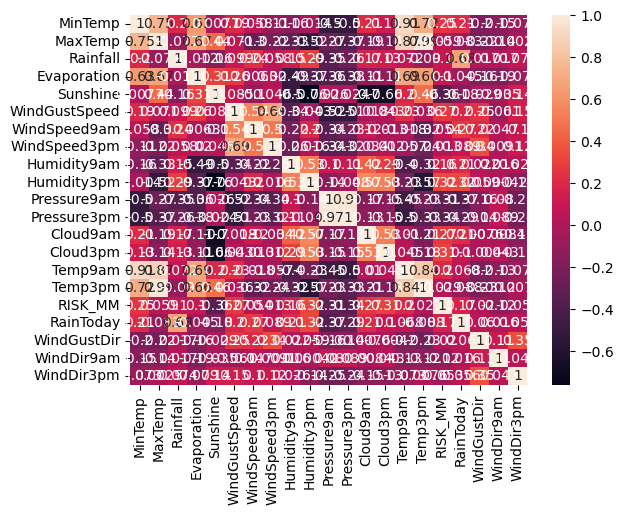

In [49]:
sns.heatmap(inputt.corr(),annot=True)

<Axes: >

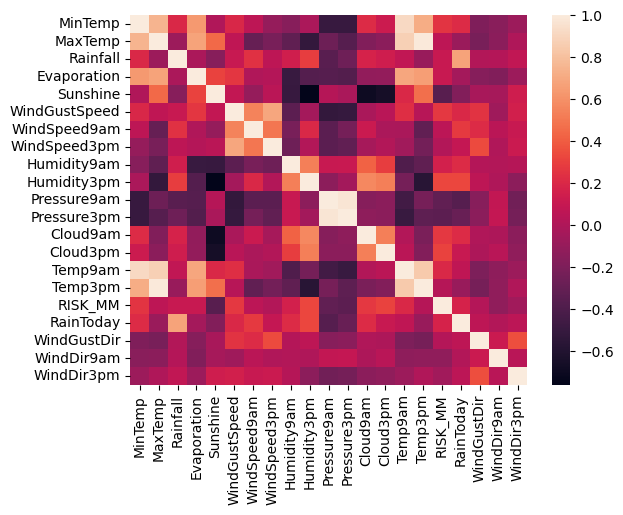

In [50]:
sns.heatmap(inputt.corr())

In [51]:
yc=confusion_matrix(yyt,ppy)
yc

array([[27,  0],
       [ 5,  1]], dtype=int64)

Text(50.722222222222214, 0.5, 'pridected')

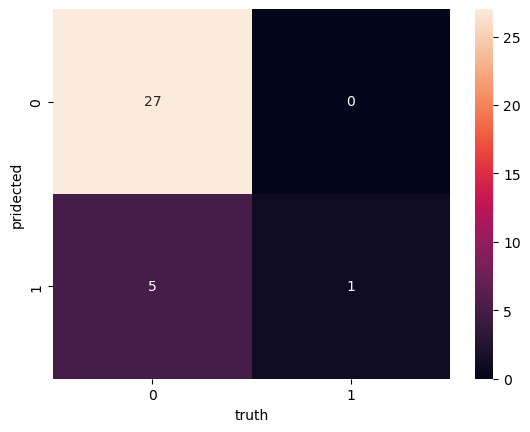

In [52]:
sns.heatmap(yc,annot=True)
plt.xlabel("truth")
plt.ylabel("pridected")